<a href="https://colab.research.google.com/github/grjadhav409/Dengue-inhibitors-prediction-using-ML/blob/main/6_model_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import libraries**

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **data import**
df

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drug discovery/Dengue/discriptors_3_1.csv')
df

,Unnamed: 0,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0.00,8.00,8.00,4.00,0.00,0.00,0.00,0.00,23.00,4.29
1,1,1,0,1,0,0,0,0,0,0,...,0.00,6.00,6.00,6.00,0.00,0.00,0.00,0.00,17.00,4.52
2,2,0,0,0,0,1,0,0,0,0,...,0.00,4.00,4.00,3.00,2.00,0.00,0.00,0.00,18.00,4.42
3,3,0,0,0,0,1,0,0,0,0,...,0.00,3.00,3.00,3.00,2.00,0.00,0.00,0.00,19.00,4.29
4,4,0,0,0,0,0,0,0,0,0,...,2.00,1.00,1.00,2.00,0.00,0.00,0.00,0.00,14.00,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,955,1,1,1,1,0,0,0,0,0,...,2.00,9.00,9.00,6.00,0.00,0.00,0.00,0.00,19.00,5.02
956,956,1,1,1,1,0,0,0,0,0,...,1.00,20.00,20.00,4.00,0.00,0.00,0.00,0.00,16.00,4.00
957,957,0,0,0,0,1,0,0,0,0,...,0.00,3.00,3.00,1.00,3.00,0.00,0.00,0.00,13.00,4.04
958,958,1,0,1,0,0,0,0,0,1,...,1.00,5.00,5.00,5.00,2.00,0.00,0.00,0.00,14.00,4.20


In [ ]:
p = df.drop('Unnamed: 0', axis=1)
X = p.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(960, 11232)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(960, 2429)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### ignore low varience

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [ ]:
X_train.shape

(768, 50)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 51811.99it/s]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.00,0.20
ExtraTreeRegressor,1.00,1.00,0.00,0.05
ExtraTreesRegressor,1.00,1.00,0.00,1.88
GaussianProcessRegressor,1.00,1.00,0.00,0.28
XGBRegressor,1.00,1.00,0.00,8.45
HistGradientBoostingRegressor,0.98,0.98,0.05,4.90
LGBMRegressor,0.98,0.98,0.06,11.26
RandomForestRegressor,0.86,0.87,0.13,6.32
NuSVR,0.81,0.82,0.15,0.67


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


## **5. Data visualization of model performance**

[(0.0, 1.0)]

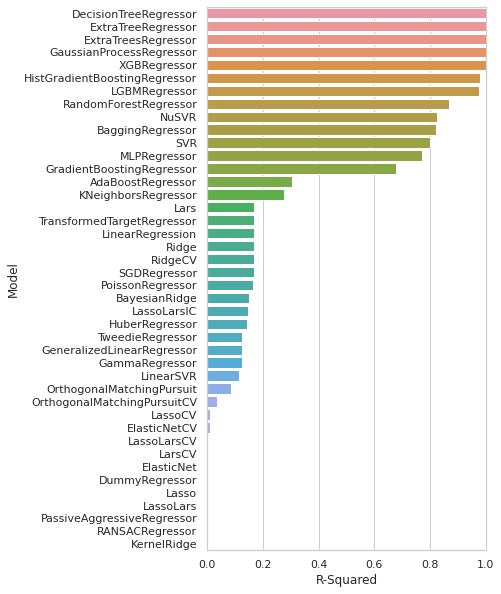

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

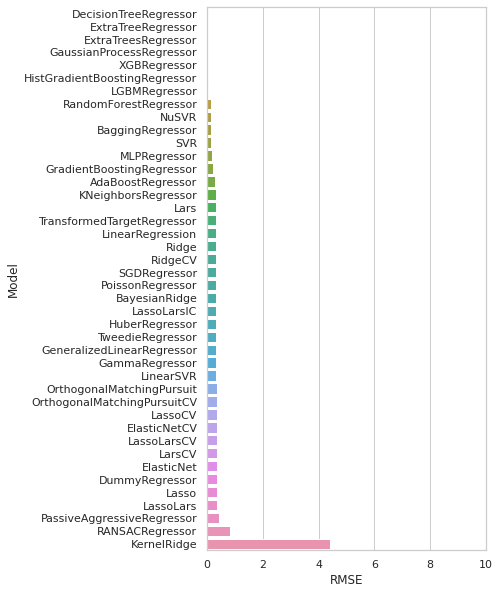

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

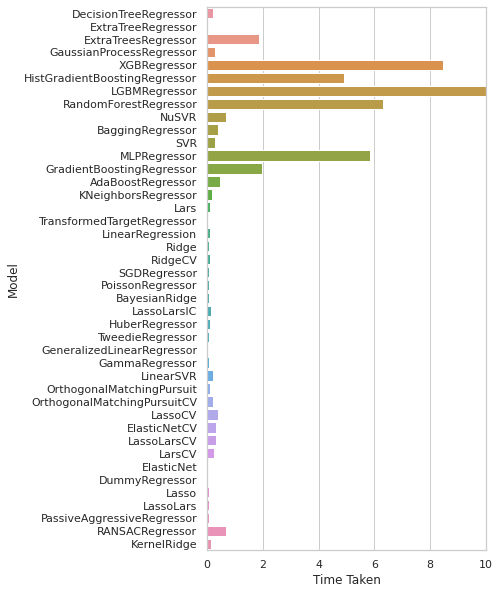

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))